<a href="https://colab.research.google.com/github/sandeepkumar3103/Car-Price-Prediction-using-Gradient-Boosting-Regressor-/blob/main/Car_Dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
data_bangalore = pd.read_excel('/content/bangalore_cars.xlsx')
data_bangalore.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [3]:
data_bangalore['new_car_detail'][0]

"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [4]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []

for i in range(data_bangalore.shape[0]):
    new_car_detail = data_bangalore['new_car_detail'][i]
    new_car_overview = data_bangalore['new_car_overview'][i]
    new_car_specs = data_bangalore['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_bangalore['Fuel_Type'] = fuel_type
data_bangalore['Kilometers_Driven'] = Kilometers_driven
data_bangalore['Transmission_Type'] = Transmission_type
data_bangalore['No_of_Owners'] = No_of_owners
data_bangalore['Manufactured_By'] = Original_Equipment_Manufacturer
data_bangalore['Car_Model'] = model
data_bangalore['Car_Produced_Year'] = model_Year
data_bangalore['Car_Price'] = Price
data_bangalore['Registration_Year'] = registration_year
data_bangalore['No_of_Seats'] = seats
data_bangalore['Engine_CC'] = engine_cc
data_bangalore['Mileage(kmpl)'] = Mileage

In [5]:
data_bangalore.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.1
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.1
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65


In [6]:
data_bangalore['Location'] = 'Bangalore'

In [7]:
data_chennai = pd.read_excel('/content/chennai_cars.xlsx')
data_chennai.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ..."
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."


In [8]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_chennai.shape[0]):
    new_car_detail = data_chennai['new_car_detail'][i]
    new_car_overview = data_chennai['new_car_overview'][i]
    new_car_specs = data_chennai['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_chennai['Fuel_Type'] = fuel_type
data_chennai['Kilometers_Driven'] = Kilometers_driven
data_chennai['Transmission_Type'] = Transmission_type
data_chennai['No_of_Owners'] = No_of_owners
data_chennai['Manufactured_By'] = Original_Equipment_Manufacturer
data_chennai['Car_Model'] = model
data_chennai['Car_Produced_Year'] = model_Year
data_chennai['Car_Price'] = Price
data_chennai['Registration_Year'] = registration_year
data_chennai['No_of_Seats'] = seats
data_chennai['Engine_CC'] = engine_cc
data_chennai['Mileage(kmpl)'] = Mileage

In [9]:
data_chennai.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"20,000",Automatic,1,Kia,Kia Sonet,2022,1150000.0,2022,5,998,9
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"20,687",Manual,1,Maruti,Maruti Eeco,2015,415000.0,2015,7,1196,15.37
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"30,000",Manual,1,Nissan,Nissan Magnite,2021,750000.0,2021,5,999,20
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"59,247",Manual,1,Hyundai,Hyundai i10,2015,398000.0,2015,5,1086,19.81
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"50,000",Manual,1,Honda,Honda Jazz,2015,550000.0,2015,5,1199,18.7


In [10]:
data_chennai['Location'] = 'Chennai'

In [11]:
data_delhi = pd.read_excel('/content/delhi_cars.xlsx')
data_delhi.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [12]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_delhi.shape[0]):
    new_car_detail = data_delhi['new_car_detail'][i]
    new_car_overview = data_delhi['new_car_overview'][i]
    new_car_specs = data_delhi['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_delhi['Fuel_Type'] = fuel_type
data_delhi['Kilometers_Driven'] = Kilometers_driven
data_delhi['Transmission_Type'] = Transmission_type
data_delhi['No_of_Owners'] = No_of_owners
data_delhi['Manufactured_By'] = Original_Equipment_Manufacturer
data_delhi['Car_Model'] = model
data_delhi['Car_Produced_Year'] = model_Year
data_delhi['Car_Price'] = Price
data_delhi['Registration_Year'] = registration_year
data_delhi['No_of_Seats'] = seats
data_delhi['Engine_CC'] = engine_cc
data_delhi['Mileage(kmpl)'] = Mileage

In [13]:
data_delhi.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"10,000",Automatic,1,Kia,Kia Seltos,2022,1900000.0,2022,5,1493,18
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,762000.0,2016,5,1591,15.29
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000.0,2020,5,1991,12.74
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"28,151",Manual,2,Maruti,Maruti Swift,2018,523000.0,2019,5,1197,22.38
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,765000.0,2017,5,1591,15.29


In [14]:
data_delhi['Location'] = 'delhi'

In [15]:
data_hyderabad = pd.read_excel('/content/hyderabad_cars clean_data.xlsx')
data_hyderabad.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",Mileage,21.1 kmp,{'key': 'Engine',value': '814 CC'},{'key': 'Max Power',value': '55.2bhp'},{'key': 'Torque',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",Engine,1197 CC,{'key': 'Max Power',value': '81.80bhp'},{'key': 'Torque',value': '113.8Nm'},{'key': 'Seats',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",Mileage,21.4 kmp,{'key': 'Engine',value': '1197 CC'},{'key': 'Max Power',value': '83.1bhp'},{'key': 'Torque',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",Engine,1997 CC,{'key': 'Max Power',value': '150bhp'},{'key': 'Torque',value': '320Nm'},{'key': 'Wheel Size',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_hyderabad.shape[0]):
    new_car_detail = data_hyderabad['new_car_detail'][i]
    new_car_overview = data_hyderabad['new_car_overview'][i]
    new_car_specs = data_hyderabad['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    # Handle the different structure and NaN values in new_car_specs for Hyderabad data
    if pd.isna(new_car_specs):
        engine_cc.append(np.nan)
        Mileage.append(np.nan)
    else:
        try:
            data_dict_2 = ast.literal_eval(new_car_specs)
            try:
                if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
                    engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
                else:
                    engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
            except:
                engine_cc.append(np.nan)

            Mileage.append(data_dict_2['top'][0]['value'][:-5])
        except:
            # Extract data from 'Unnamed' columns if ast.literal_eval fails
            try:
                engine_cc_val = data_hyderabad['Unnamed: 6'][i]
                if isinstance(engine_cc_val, str) and 'CC' in engine_cc_val:
                    engine_cc.append(engine_cc_val.split(' ')[1])
                else:
                    engine_cc.append(np.nan)
            except:
                engine_cc.append(np.nan)

            try:
                mileage_val = data_hyderabad['Unnamed: 5'][i]
                if isinstance(mileage_val, str) and 'kmp' in mileage_val:
                    Mileage.append(mileage_val.split(' ')[0])
                else:
                    Mileage.append(np.nan)
            except:
                Mileage.append(np.nan)


data_hyderabad['Fuel_Type'] = fuel_type
data_hyderabad['Kilometers_Driven'] = Kilometers_driven
data_hyderabad['Transmission_Type'] = Transmission_type
data_hyderabad['No_of_Owners'] = No_of_owners
data_hyderabad['Manufactured_By'] = Original_Equipment_Manufacturer
data_hyderabad['Car_Model'] = model
data_hyderabad['Car_Produced_Year'] = model_Year
data_hyderabad['Car_Price'] = Price
data_hyderabad['Registration_Year'] = registration_year
data_hyderabad['No_of_Seats'] = seats
data_hyderabad['Engine_CC'] = engine_cc
data_hyderabad['Mileage(kmpl)'] = Mileage

In [17]:
data_hyderabad.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Automatic,1,Volkswagen,Volkswagen Polo,2022,1044000.0,2022,5,NaN,NaN
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",Mileage,21.1 kmp,{'key': 'Engine',value': '814 CC'},{'key': 'Max Power',value': '55.2bhp'},{'key': 'Torque',...,Manual,2,Hyundai,Hyundai EON,2014,260000.0,2014,5,'814,NaN
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",Engine,1197 CC,{'key': 'Max Power',value': '81.80bhp'},{'key': 'Torque',value': '113.8Nm'},{'key': 'Seats',...,Manual,1,Hyundai,Hyundai Venue,2023,955000.0,2023,5,NaN,NaN
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",Mileage,21.4 kmp,{'key': 'Engine',value': '1197 CC'},{'key': 'Max Power',value': '83.1bhp'},{'key': 'Torque',...,Manual,1,Maruti,Maruti Baleno,2017,671000.0,2017,5,'1197,NaN
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...",Engine,1997 CC,{'key': 'Max Power',value': '150bhp'},{'key': 'Torque',value': '320Nm'},{'key': 'Wheel Size',...,Automatic,1,Mahindra,Mahindra Thar,2022,1900000.0,2022,4,NaN,NaN


In [18]:
data_hyderabad['Location'] = 'Hyderabad'

In [19]:
data_jaipur = pd.read_excel('jaipur_cars.xlsx')
data_jaipur.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [20]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_jaipur.shape[0]):
    new_car_detail = data_jaipur['new_car_detail'][i]
    new_car_overview = data_jaipur['new_car_overview'][i]
    new_car_specs = data_jaipur['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_jaipur['Fuel_Type'] = fuel_type
data_jaipur['Kilometers_Driven'] = Kilometers_driven
data_jaipur['Transmission_Type'] = Transmission_type
data_jaipur['No_of_Owners'] = No_of_owners
data_jaipur['Manufactured_By'] = Original_Equipment_Manufacturer
data_jaipur['Car_Model'] = model
data_jaipur['Car_Produced_Year'] = model_Year
data_jaipur['Car_Price'] = Price
data_jaipur['Registration_Year'] = registration_year
data_jaipur['No_of_Seats'] = seats
data_jaipur['Engine_CC'] = engine_cc
data_jaipur['Mileage(kmpl)'] = Mileage

In [21]:
data_jaipur.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,510000.0,2015,5,1396,22.54
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"66,951",Manual,1,Maruti,Maruti Swift,2012,381000.0,2012,5,1197,22.38
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,320000.0,2016,5,998,23.1
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,420000.0,2017,5,1197,18.9
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,350000.0,2016,5,998,20.51


In [22]:
data_jaipur['Location'] = 'Jaipur'

In [23]:
data_kolkata = pd.read_excel('kolkata_cars.xlsx')
data_kolkata.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [24]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_kolkata.shape[0]):
    new_car_detail = data_kolkata['new_car_detail'][i]
    new_car_overview = data_kolkata['new_car_overview'][i]
    new_car_specs = data_kolkata['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_kolkata['Fuel_Type'] = fuel_type
data_kolkata['Kilometers_Driven'] = Kilometers_driven
data_kolkata['Transmission_Type'] = Transmission_type
data_kolkata['No_of_Owners'] = No_of_owners
data_kolkata['Manufactured_By'] = Original_Equipment_Manufacturer
data_kolkata['Car_Model'] = model
data_kolkata['Car_Produced_Year'] = model_Year
data_kolkata['Car_Price'] = Price
data_kolkata['Registration_Year'] = registration_year
data_kolkata['No_of_Seats'] = seats
data_kolkata['Engine_CC'] = engine_cc
data_kolkata['Mileage(kmpl)'] = Mileage

In [25]:
data_kolkata.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73


In [26]:
data_kolkata['Location'] = 'Kolkata'

In [27]:
data = pd.concat([data_kolkata,data_chennai,data_bangalore,data_hyderabad,data_jaipur,data_delhi]).reset_index()

In [28]:
data.shape

(8369, 113)

In [29]:
data

,index,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,...,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98
0,0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Automatic,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8365,1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Manual,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8366,1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8367,1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"38,000",Manual,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.drop(['index','new_car_detail','new_car_overview','new_car_feature','new_car_specs','car_links'], axis = 1, inplace = True)

In [31]:
Car_Produced_Year = data[data['Registration_Year'].isin(['sive', 'able', 'ance','arty'])]['Car_Produced_Year']
data.loc[data['Registration_Year'].isin(['sive', 'able', 'ance','arty']),'Registration_Year'] = Car_Produced_Year

In [32]:
data['Car_Age'] = data['Car_Produced_Year'].apply(lambda x: 2024-x)

In [33]:
print(data.shape)
data.head()

(8369, 108)


,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Car_Age
0,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
4,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [34]:
data['Engine_CC'].unique()

array(['2494', '799', '999', '1197', '1968', '1086', '1298', '998',
       '1956', '2755', '1999', '1199', '1373', '1497', '1591', '1950',
       '1496', '1396', '1799', '1047', '1198', '1598', '1995', '1368',
       '1998', '1499', '1498', '1817', '1797', '2143', '1248', '796',
       '1582', '3993', '1798', '2179', '2982', '2400', '2499', '1462',
       '1997', '1996', '1451', '814', '995', '1353', '1186', '1493',
       '2393', '1948', '2993', '1984', '1120', '1461', '1390', nan,
       '2354', '1991', '1969', '2523', '4806', '2359', '2184', '3198',
       '3982', '2157', '1196', '2987', '1794', '936', '2994', '1399',
       '2198', '1495', '2967', '2696', '993', '1061', '1405', '1993',
       '1193', '1490', '1349', '0', '2995', '1364', '1395', '2609',
       '3498', '2489', '1172', '1796', '2694', '1194', '4663', '2925',
       '2999', '1896', '1482', '624', '793', '4134', '1422', '1468',
       '1599', '1586', '2199', '1330', '2477', '2998', '2997', '2487',
       '1341', '1397',

In [35]:
data.loc[(data['Engine_CC'].isin(['210AH Lithium Ion','Power','72','0']))|(data['Engine_CC'].isna()==True)]['Engine_CC'].value_counts()

,count
Engine_CC,
0,20
Power,2
210AH Lithium Ion,1
72,1


In [36]:
data.loc[data['Engine_CC'].isin(['72']),'Engine_CC'] = '720'
engine_cc = data.loc[data['Engine_CC'].isin(['Power','210AH Lithium Ion'])]
data.drop(engine_cc.index, inplace = True)

In [37]:
empty_values = data.loc[data['Mileage(kmpl)']=='']
data.drop(empty_values.index, inplace = True)

In [38]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)][['Manufactured_By','Car_Model']]

,Manufactured_By,Car_Model
257,Hyundai,Hyundai Santro Xing
261,Toyota,Toyota Etios Liva
565,Toyota,Toyota Etios Liva
567,Honda,Honda CR-V
620,Maruti,Maruti Estilo
...,...,...
6537,Hyundai,Hyundai Santro Xing
6729,Tata,Tata Indica
7268,Toyota,Toyota Etios
7737,Hyundai,Hyundai Santro Xing


In [39]:
for i,j in zip(data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Manufactured_By'],data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Car_Model']):
    value = data.loc[(data['Manufactured_By'] == i)&(data['Car_Model'] == j)]['Engine_CC'].value_counts().index[0]
    data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True),'Engine_CC'] = value

In [40]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)].shape

(0, 108)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8346 entries, 0 to 8368
Columns: 108 entries, Fuel_Type to Car_Age
dtypes: float64(1), int64(3), object(104)
memory usage: 6.9+ MB


In [42]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(str).apply(lambda x: x.replace(',',''))
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype('int')
data['Registration_Year'] = data['Registration_Year'].astype(str).astype('int')
data['No_of_Seats'] = data['No_of_Seats'].astype(str).astype('int')
data['Engine_CC'] = data['Engine_CC'].astype(str).apply(lambda x: x.replace("'","")).astype('int')
data['Mileage(kmpl)'] = data['Mileage(kmpl)'].astype(str).astype('float')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8346 entries, 0 to 8368
Columns: 108 entries, Fuel_Type to Car_Age
dtypes: float64(2), int64(7), object(99)
memory usage: 6.9+ MB


In [44]:
data[data.duplicated()]

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Car_Age
24,Diesel,30000,Automatic,2,Land Rover,Land Rover Range Rover Evoque,2020,5990000.0,2020,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
45,Petrol,60000,Manual,1,Maruti,Maruti Swift Dzire,2010,245000.0,2010,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
190,Petrol,10000,Manual,2,Maruti,Maruti XL6,2021,950000.0,2021,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
207,Petrol,10000,Manual,1,Tata,Tata Altroz,2020,735000.0,2020,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
215,Petrol,100000,Manual,1,Hyundai,Hyundai i10,2015,310000.0,2015,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Diesel,100000,Manual,1,Ford,Ford Aspire,2015,315000.0,2015,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8126,Diesel,40000,Automatic,1,Mercedes-Benz,Mercedes-Benz CLA,2018,2650000.0,2018,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
8188,Petrol,20000,Manual,2,Kia,Kia Seltos,2021,925000.0,2021,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
8324,Petrol,30000,Manual,1,Toyota,Toyota Glanza,2022,740000.0,2022,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [45]:
data.drop_duplicates(inplace = True)

In [46]:
data.shape

(8225, 108)

In [47]:
8135

8135

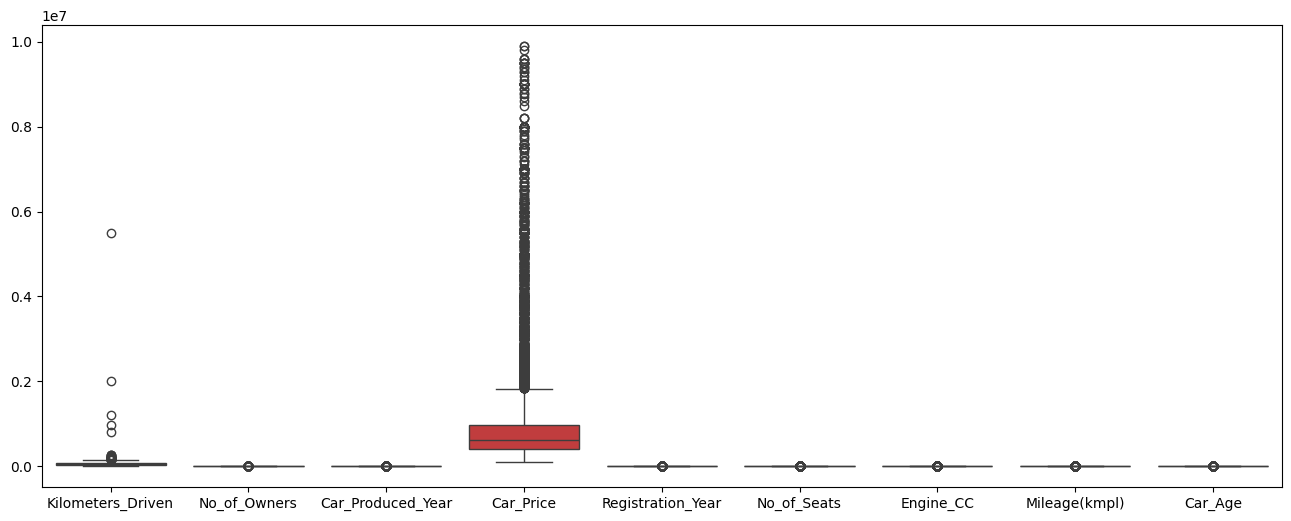

In [48]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

Kilometers_Driven


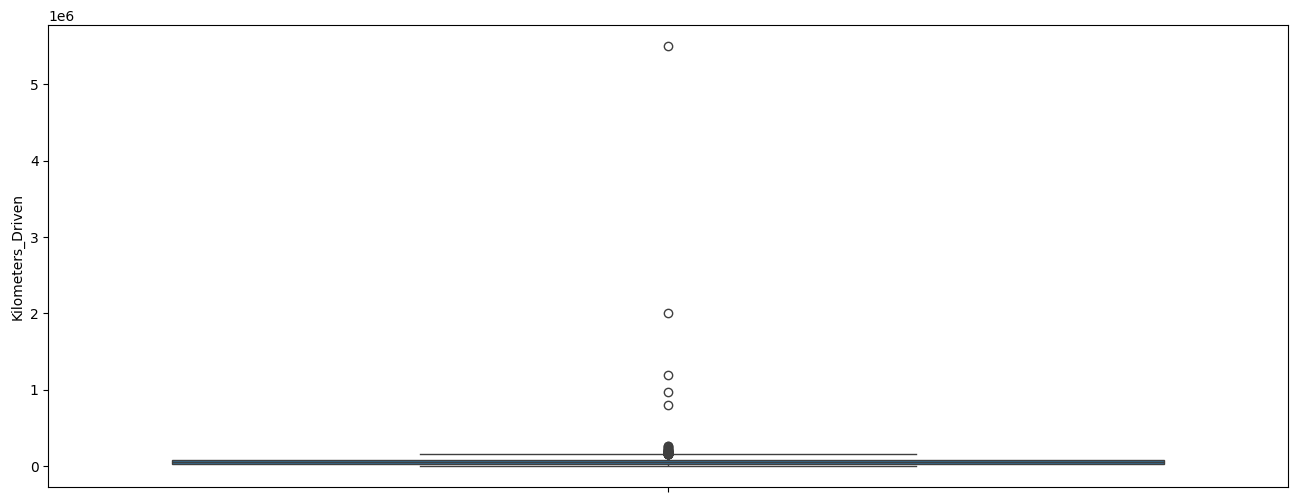

No_of_Owners


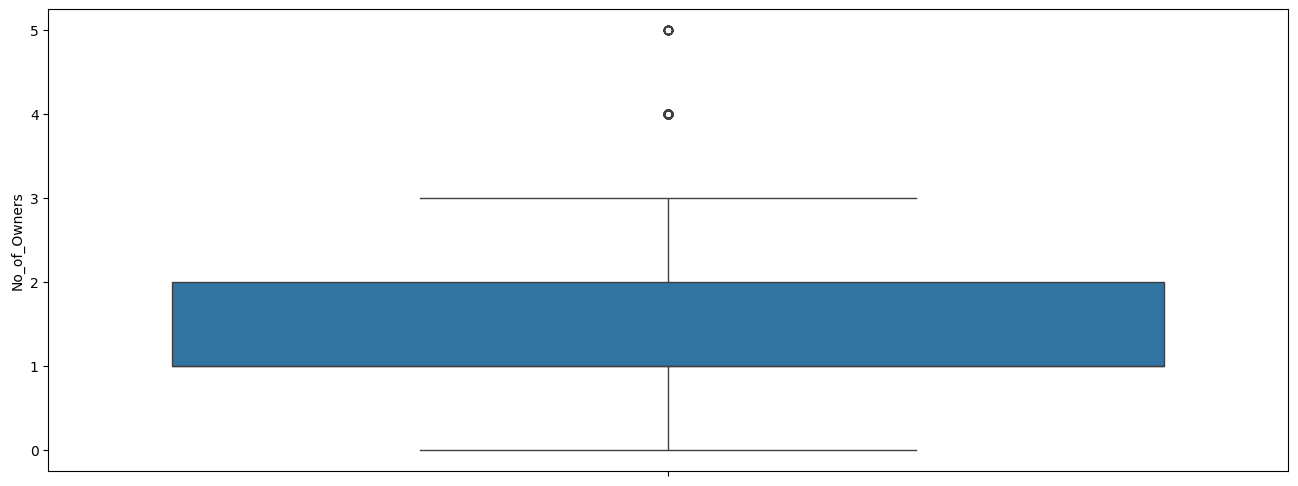

Car_Produced_Year


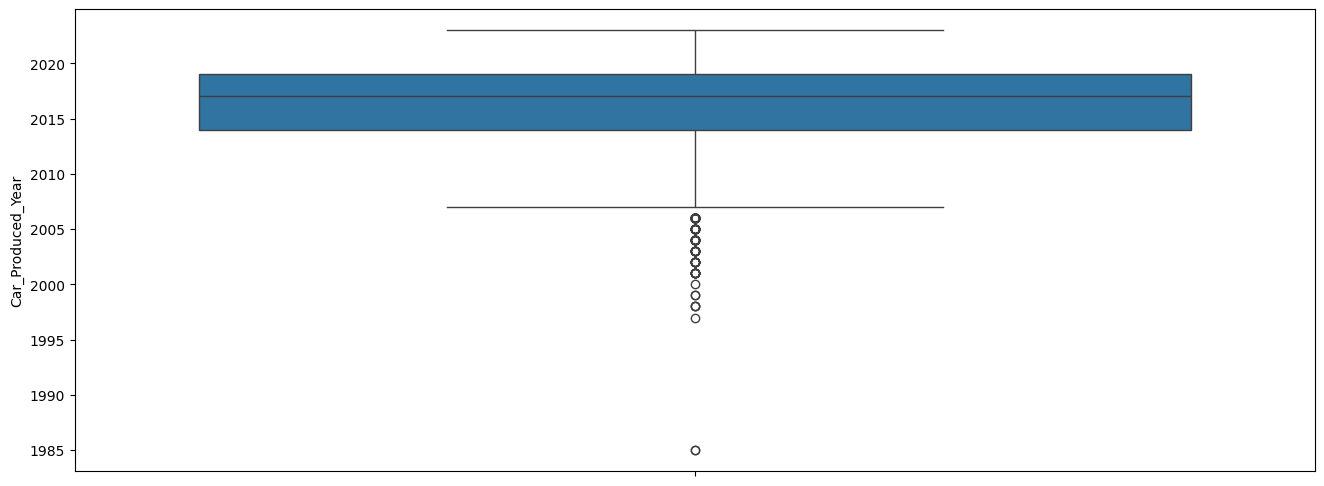

Car_Price


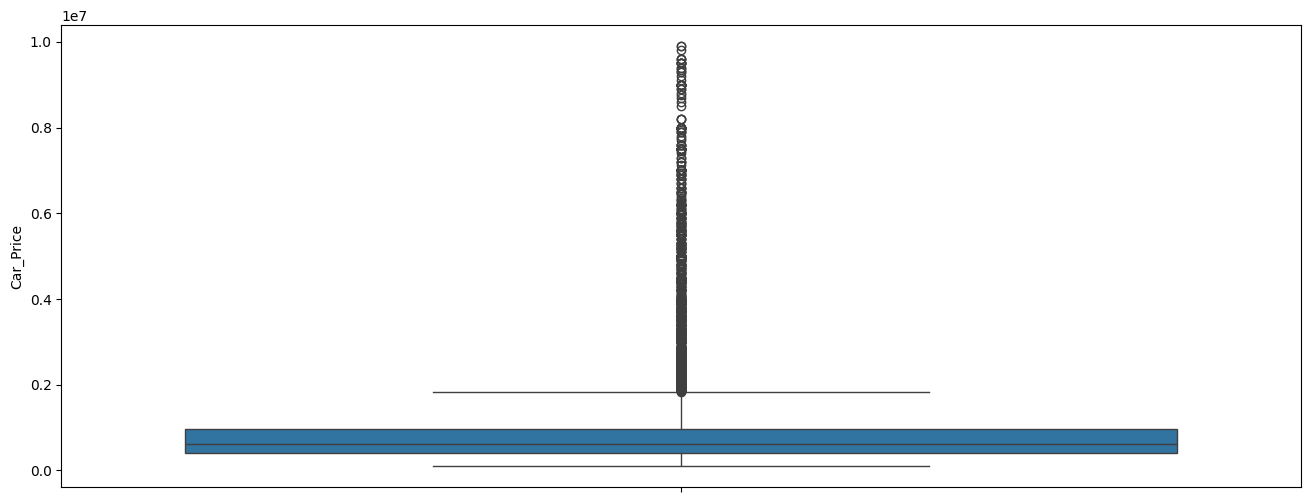

Registration_Year


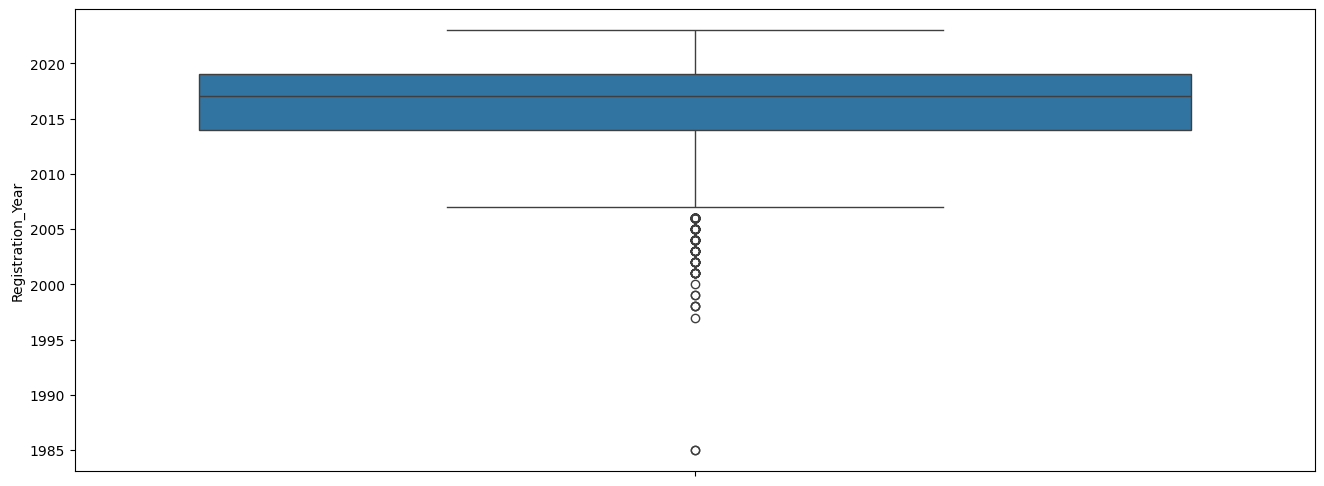

No_of_Seats


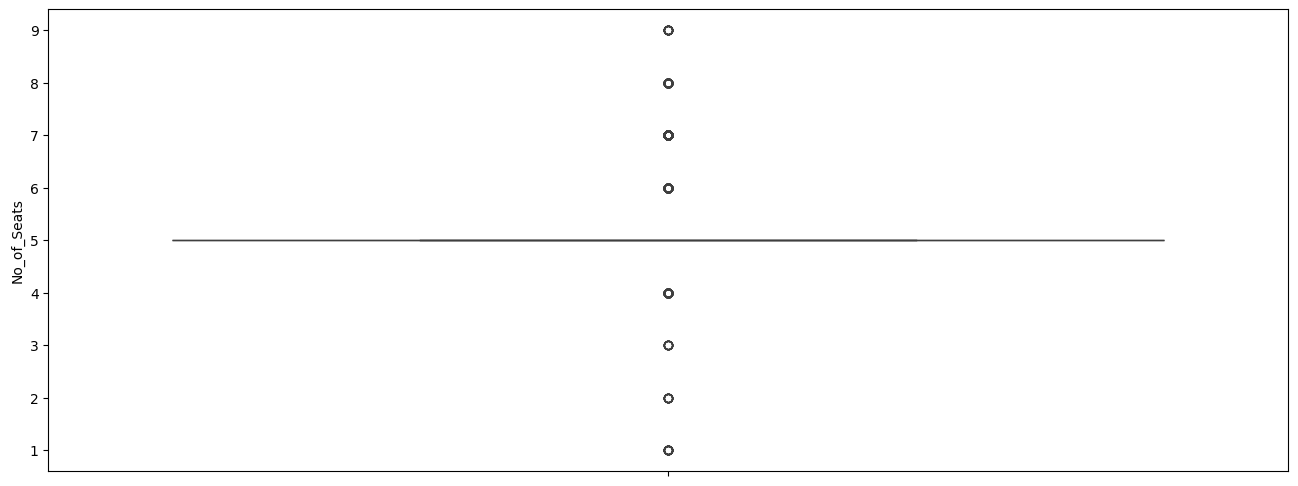

Engine_CC


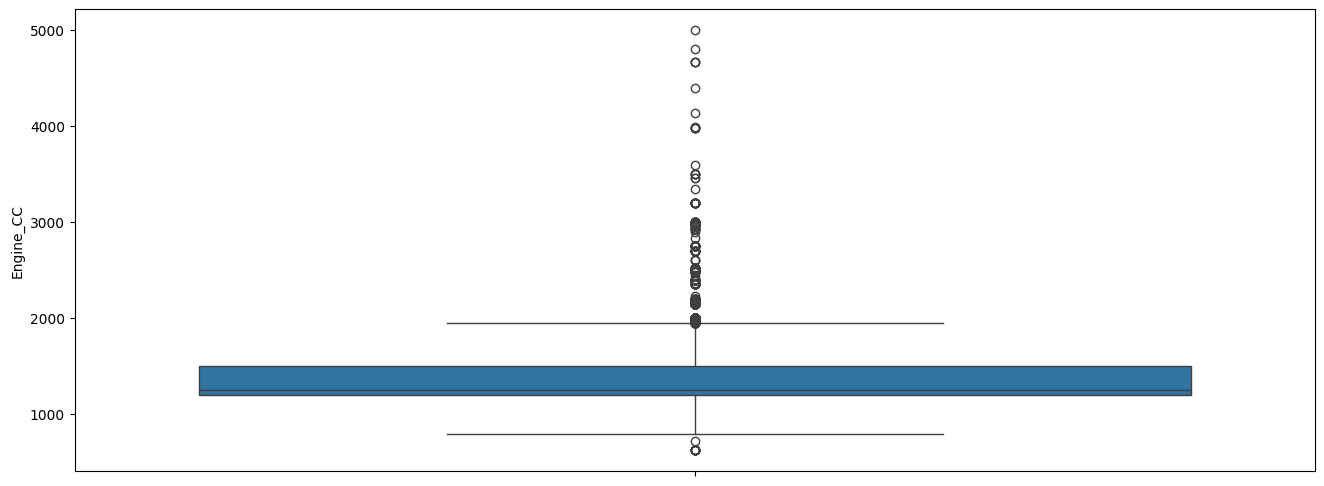

Mileage(kmpl)


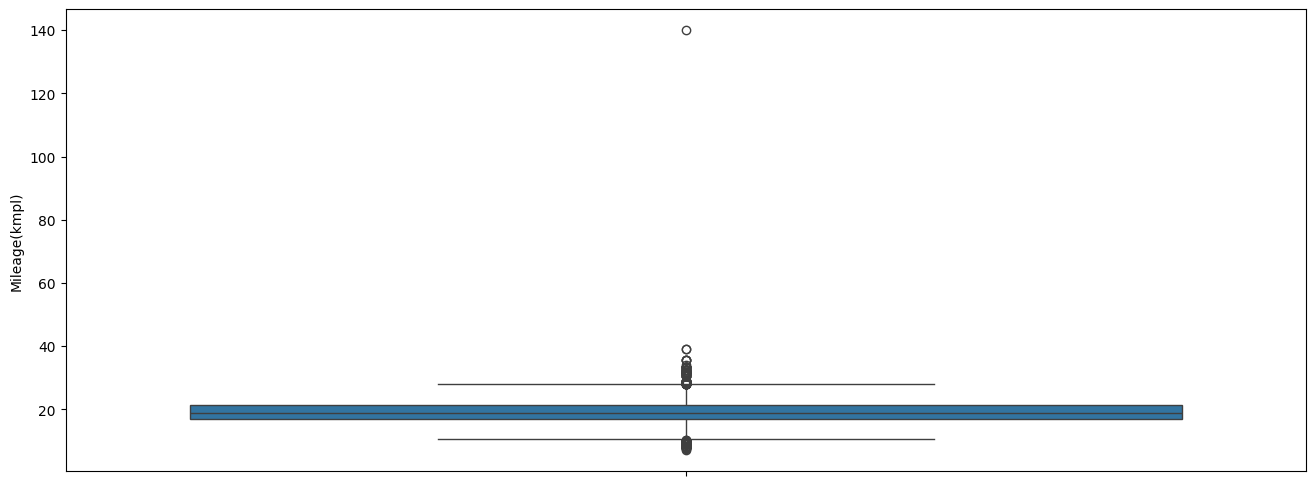

Car_Age


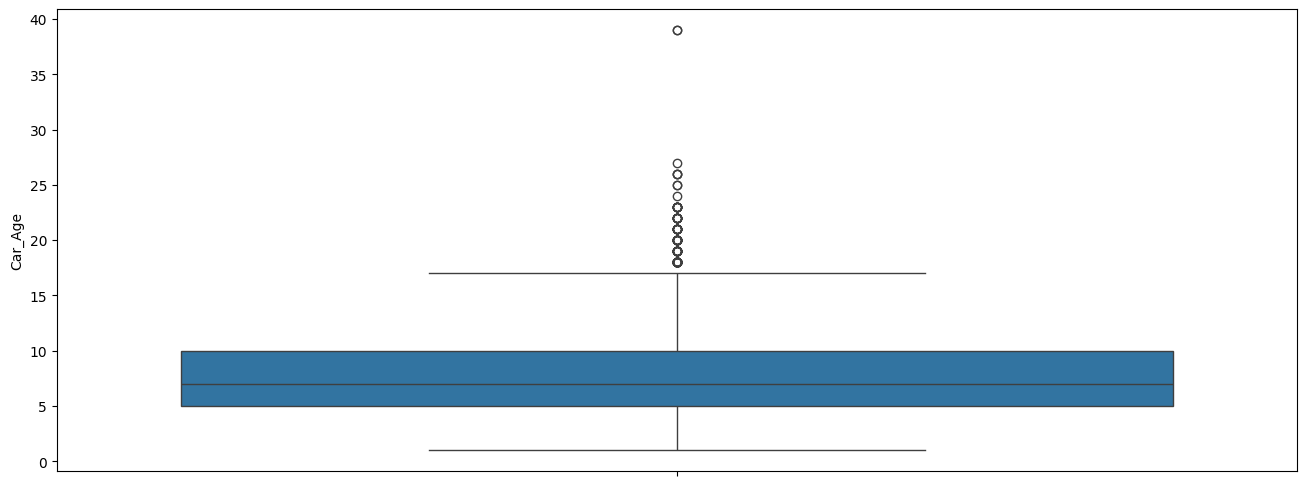

In [49]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.boxplot(data=data[i])
        plt.show()

In [50]:
price = data[(data['Car_Produced_Year']<2009)&(data['Car_Price']>1000000)&(data['Manufactured_By']!= 'BMW')]
data.drop(price.index, inplace = True)

In [51]:
data.to_csv('Cleaned_Car_Dheko.csv', index = False)

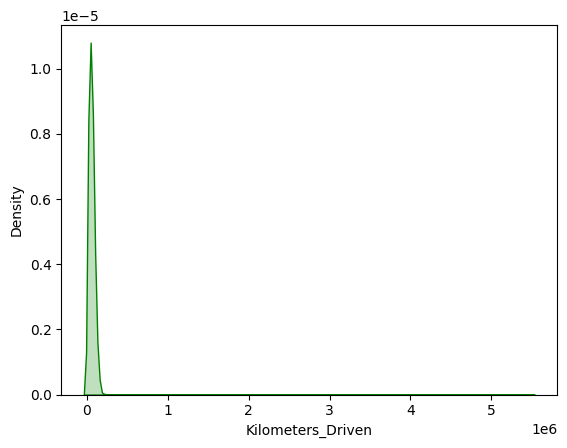

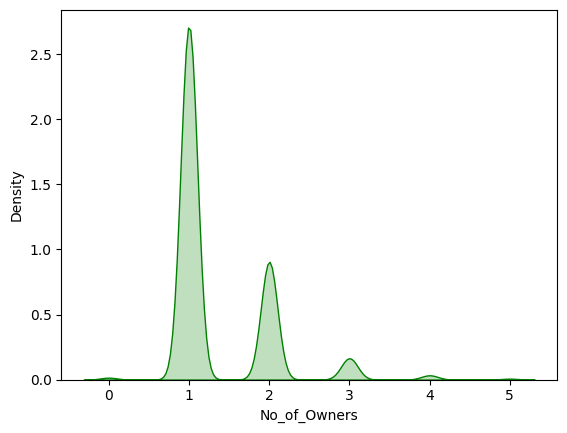

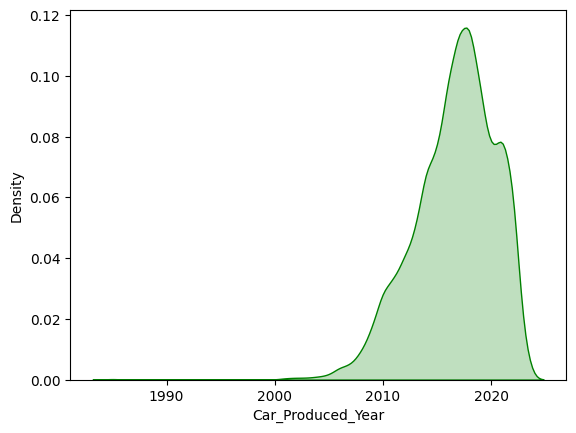

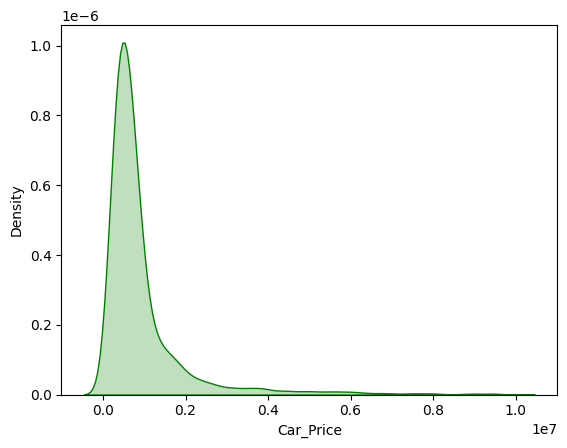

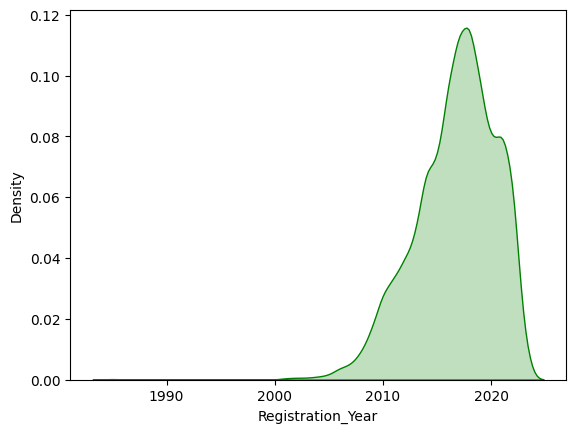

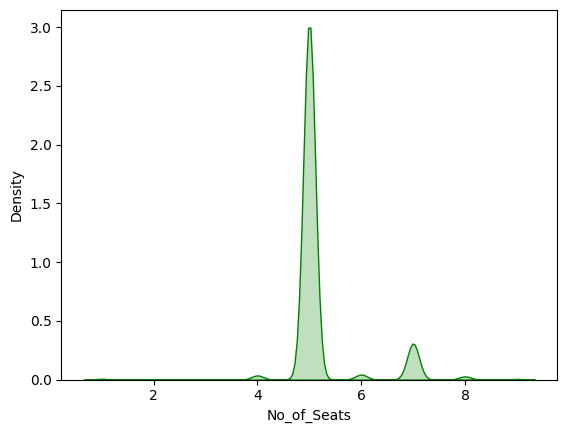

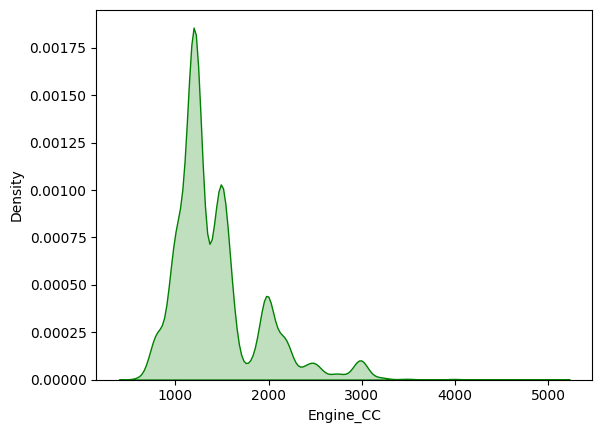

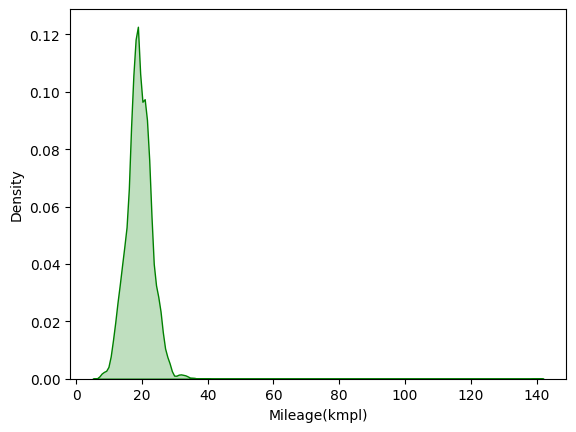

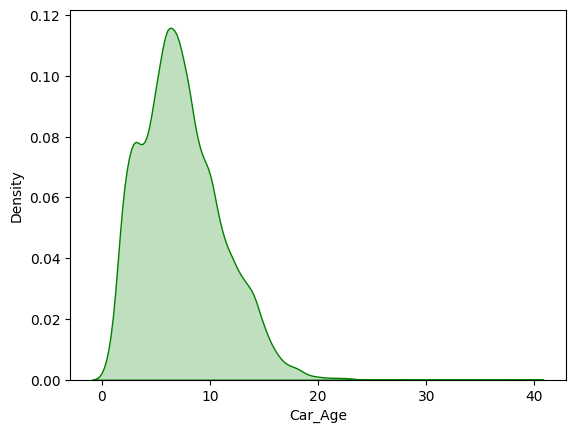

In [52]:
for i in data.columns:
    if data[i].dtype != 'object' :
        sns.kdeplot(data=data[i],fill=True,color="g")
        plt.show()

In [53]:
def inv_trans(x):
    if x!=0:
        return 1/x
    else:
        return 0

# data = data_3.copy()
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(inv_trans)


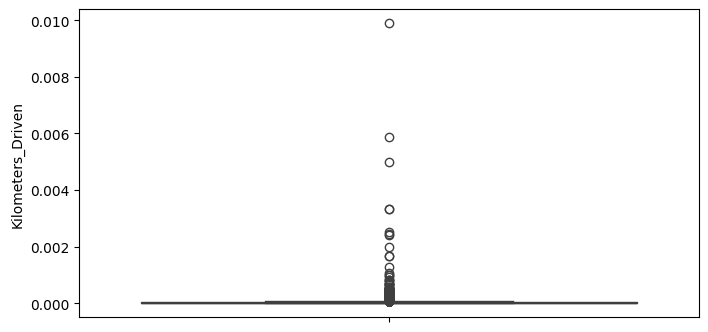

In [54]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data['Kilometers_Driven'])
plt.show()

In [55]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        col_name = i
        # Fill NaN values with an empty string before encoding
        data[i] = data[i].fillna('').astype(str)
        data[i] = enc.fit_transform(data[[i]])
        encode = data[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(data[[i]])
        decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
        globals()[i] = dict(zip(decoded, encode))

In [56]:
Location

{'Bangalore': np.float64(0.0),
 'Chennai': np.float64(1.0),
 'Hyderabad': np.float64(2.0),
 'Jaipur': np.float64(3.0),
 'Kolkata': np.float64(4.0),
 'delhi': np.float64(5.0)}

In [57]:
data.to_csv('Preprocessed_Car_Dheko.csv', index = False)

In [58]:
df = pd.read_csv('Preprocessed_Car_Dheko.csv')

In [59]:
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','Car_Price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)','Car_Age']]
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','Location']]

<Axes: >

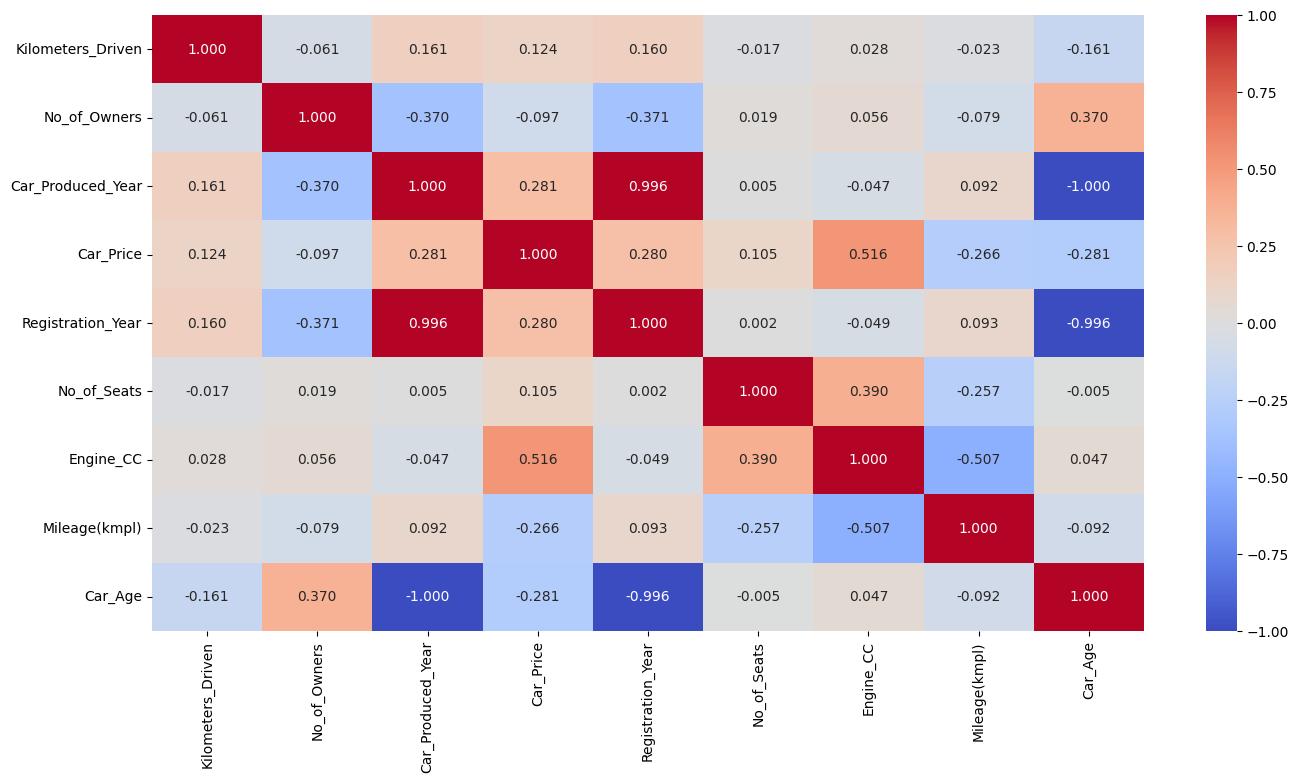

In [60]:
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".3f")

In [61]:
df.drop(df[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [62]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 5.433644408805172e-27
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type Location 1.1260354904612128e-39
Transmission_Type Fuel_Type 5.433644408805172e-27
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type Location 1.3783758753929665e-32
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By Location 1.713461898560796e-35
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model Location 2.6824802126147674e-49
Location Fuel_Type 1.1260354904612126e-39
Location Transmission_Type 1.3783758753929865e-32
Location Manufactured_By 1.713461898560796e-35
Location Car_Model 2.6824802126147674e-49
Location Location 0.0


In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
features = df.drop('Car_Price',axis = 1)
target = df['Car_Price']

In [65]:
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [66]:
model.feature_importances_

array([6.94205236e-03, 6.96396603e-02, 8.45356916e-02, 1.22470434e-02,
       1.71661127e-02, 5.79829580e-02, 1.86016144e-01, 1.19081853e-02,
       4.47010159e-01, 6.36227387e-02, 2.81027375e-02, 1.56257143e-04,
       3.01819499e-04, 8.88921831e-05, 4.30117790e-04, 2.53253721e-03,
       4.56879723e-04, 3.99873695e-06, 1.77898229e-04, 1.21728752e-04,
       4.37406013e-05, 6.07997835e-06, 5.09968925e-05, 4.47082206e-05,
       2.77736900e-04, 6.13607814e-06, 5.98080376e-05, 1.04710707e-05,
       4.88634142e-05, 6.92303869e-05, 1.42530056e-04, 8.96431749e-05,
       2.24320817e-04, 2.50627256e-05, 2.75366573e-05, 2.42970173e-06,
       1.12353302e-04, 2.06112952e-04, 3.43416278e-04, 3.59132315e-05,
       9.41187649e-05, 5.27924821e-05, 2.91470799e-05, 1.30886989e-05,
       8.82490887e-05, 9.04169199e-05, 3.22277484e-04, 5.89114611e-05,
       3.04000906e-03, 1.59731553e-05, 3.27824089e-04, 4.50065070e-05,
       1.57592101e-04, 4.45426696e-05, 4.69571023e-04, 1.77731495e-04,
      

In [67]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)#.head(12).column.values
feature_importance

,column,Score
8,Engine_CC,44.701016
6,Car_Produced_Year,18.601614
2,Transmission_Type,8.453569
1,Kilometers_Driven,6.963966
9,Mileage(kmpl),6.362274
...,...,...
98,Unnamed: 92,0.000000
100,Unnamed: 94,0.000000
101,Unnamed: 95,0.000000
102,Unnamed: 96,0.000000


In [82]:
col = df.columns
col

Index(['Fuel_Type', 'Kilometers_Driven', 'Transmission_Type', 'No_of_Owners',
       'Manufactured_By', 'Car_Model', 'Car_Produced_Year', 'Car_Price',
       'No_of_Seats', 'Engine_CC',
       ...
       'Unnamed: 89', 'Unnamed: 90', 'Unnamed: 91', 'Unnamed: 92',
       'Unnamed: 93', 'Unnamed: 94', 'Unnamed: 95', 'Unnamed: 96',
       'Unnamed: 97', 'Unnamed: 98'],
      dtype='object', length=106)

In [ ]:
df = df.drop(columns = [col[i] for i in range(10,105)])

In [90]:
df.drop(columns = ['Unnamed: 98'],inplace = True)

In [91]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8145 non-null   float64
 1   Kilometers_Driven  8145 non-null   float64
 2   Transmission_Type  8145 non-null   float64
 3   No_of_Owners       8145 non-null   int64  
 4   Manufactured_By    8145 non-null   float64
 5   Car_Model          8145 non-null   float64
 6   Car_Produced_Year  8145 non-null   int64  
 7   Car_Price          8145 non-null   float64
 8   No_of_Seats        8145 non-null   int64  
 9   Engine_CC          8145 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 636.5 KB


In [92]:
x = df.drop(['Car_Price','No_of_Seats','No_of_Owners'],axis = 1)
y = df['Car_Price']
print(x.shape)
x

(8145, 7)


,Fuel_Type,Kilometers_Driven,Transmission_Type,Manufactured_By,Car_Model,Car_Produced_Year,Engine_CC
0,4.0,0.000014,0.0,29.0,268.0,2014,2494
1,4.0,0.000042,1.0,4.0,38.0,2017,799
2,4.0,0.000141,0.0,26.0,232.0,2021,999
3,4.0,0.000014,1.0,9.0,88.0,2011,1197
4,1.0,0.000020,0.0,0.0,7.0,2014,1968
...,...,...,...,...,...,...,...
8140,4.0,0.000017,0.0,8.0,62.0,2019,1497
8141,4.0,0.000050,1.0,13.0,106.0,2021,1197
8142,4.0,0.000017,1.0,9.0,84.0,2011,1591
8143,1.0,0.000026,1.0,9.0,72.0,2019,1582


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [94]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6516, 7), (1629, 7), (6516,), (1629,))

In [71]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

173873.36435220874
237704.53890969543
0.791854919799593
0.6002466104656619


In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [95]:
model_kn = KNeighborsRegressor(n_neighbors=4)
model_kn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [96]:
y_pred_test = model_kn.predict(x_test)
y_pred_train = model_kn.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

154922.49846531614
206212.86065070596
0.8226614021988257
0.666209715018864


In [97]:
from sklearn.ensemble import AdaBoostRegressor

In [98]:
model_ada = AdaBoostRegressor(n_estimators=1000, learning_rate=0.001)
model_ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=1000)

In [99]:
y_pred_test = model_ada.predict(x_test)
y_pred_train = model_ada.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

382545.5492101461
374541.6032315363
0.543009498917894
0.5277023937287695


In [100]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error',n_estimators=700 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=700, random_state=50)

In [101]:
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

171539.35976070762
211260.4942517053
0.811973554230228
0.6754462345378802


In [102]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=7,
                          n_estimators=400)

In [103]:
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

98200.28870217859
209043.56043435945
0.9467430707897649
0.6404180662525061


In [104]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

import pickle

with open('GradientBoost_model_new1.pkl', 'wb') as file:
    pickle.dump(model_GB,file)

In [105]:
import pickle

with open('RandomForest_model_new.pkl', 'wb') as file:
    pickle.dump(model_RF,file)

In [106]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 99.7 MB/s eta 0:00:00


In [107]:
import streamlit as st
import pickle
import pandas as pd

# Load the trained model
try:
    with open('GradientBoost_model_new1.pkl', 'rb') as f:
        model = pickle.load(f)
except EOFError:
    st.error("Error loading the model. The model file might be empty or corrupted.")
    st.stop()


# Load the ordinal encoders used for preprocessing
# Assuming you saved the encoders in the previous steps, load them here
# For now, using the dictionaries created in the notebook
Fuel_Type = {'Cng': 0.0, 'Diesel': 1.0, 'Electric': 2.0, 'Lpg': 3.0, 'Petrol': 4.0}
Transmission_Type = {'Automatic': 0.0, 'Manual': 1.0}
Manufactured_By = {'Audi': 0.0, 'BMW': 1.0, 'Chevrolet': 2.0, 'Citroen': 3.0, 'Datsun': 4.0, 'Fiat': 5.0, 'Ford': 6.0, 'Hindustan Motors': 7.0, 'Honda': 8.0, 'Hyundai': 9.0, 'Isuzu': 10.0, 'Jaguar': 11.0, 'Jeep': 12.0, 'Kia': 13.0, 'Land Rover': 14.0, 'Lexus': 15.0, 'MG': 16.0, 'Mahindra': 17.0, 'Mahindra Renault': 18.0, 'Mahindra Ssangyong': 19.0, 'Maruti': 20.0, 'Mercedes-Benz': 21.0, 'Mini': 22.0, 'Mitsubishi': 23.0, 'Nissan': 24.0, 'Porsche': 25.0, 'Renault': 26.0, 'Skoda': 27.0, 'Tata': 28.0, 'Toyota': 29.0, 'Volkswagen': 30.0, 'Volvo': 31.0}
Car_Model = {'Ambassador': 0.0, 'Audi A3': 1.0, 'Audi A3 cabriolet': 2.0, 'Audi A4': 3.0, 'Audi A6': 4.0, 'Audi A8': 5.0, 'Audi Q2': 6.0, 'Audi Q3': 7.0, 'Audi Q3 Sportback': 8.0, 'Audi Q5': 9.0, 'Audi Q7': 10.0, 'Audi S5 Sportback': 11.0, 'BMW 1 Series': 12.0, 'BMW 2 Series': 13.0, 'BMW 3 Series': 14.0, 'BMW 3 Series GT': 15.0, 'BMW 3 Series Gran Limousine': 16.0, 'BMW 5 Series': 17.0, 'BMW 6 Series': 18.0, 'BMW 7 Series': 19.0, 'BMW X1': 20.0, 'BMW X3': 21.0, 'BMW X4': 22.0, 'BMW X5': 23.0, 'BMW X7': 24.0, 'Chevrolet Aveo': 25.0, 'Chevrolet Beat': 26.0, 'Chevrolet Captiva': 27.0, 'Chevrolet Cruze': 28.0, 'Chevrolet Enjoy': 29.0, 'Chevrolet Optra': 30.0, 'Chevrolet Sail': 31.0, 'Chevrolet Spark': 32.0, 'Chevrolet Tavera': 33.0, 'Citroen C3': 34.0, 'Citroen C5 Aircross': 35.0, 'Datsun GO': 36.0, 'Datsun GO Plus': 37.0, 'Datsun RediGO': 38.0, 'Fiat Abarth Avventura': 39.0, 'Fiat Avventura': 40.0, 'Fiat Grande Punto': 41.0, 'Fiat Linea': 42.0, 'Fiat Palio': 43.0, 'Fiat Punto': 44.0, 'Fiat Punto Abarth': 45.0, 'Fiat Punto EVO': 46.0, 'Fiat Punto Pure': 47.0, 'Ford Aspire': 48.0, 'Ford Ecosport': 49.0, 'Ford Endeavour': 50.0, 'Ford Fiesta': 51.0, 'Ford Fiesta Classic': 52.0, 'Ford Figo': 53.0, 'Ford Freestyle': 54.0, 'Ford Ikon': 55.0, 'Ford Mondeo': 56.0, 'Hindustan Motors Contessa': 57.0, 'Honda Amaze': 58.0, 'Others': 59.0}
Location = {'Bangalore': 0.0, 'Chennai': 1.0, 'Hyderabad': 2.0, 'Jaipur': 3.0, 'Kolkata': 4.0, 'delhi': 5.0}


def inv_trans(x):
    if x != 0:
        return 1 / x
    else:
        return 0

st.title("Car Price Prediction")

st.write("Enter the car details to get a price prediction.")

# Create input fields for features
kilometers_driven = st.number_input("Kilometers Driven", min_value=0)
transmission_type = st.selectbox("Transmission Type", list(Transmission_Type.keys()))
car_model = st.selectbox("Car Model", list(Car_Model.keys()))
car_produced_year = st.number_input("Car Produced Year", min_value=1900, max_value=2024, step=1)
engine_cc = st.number_input("Engine CC", min_value=0)
mileage_kmpl = st.number_input("Mileage (kmpl)", min_value=0.0)
location = st.selectbox("Location", list(Location.keys()))

if st.button("Predict Price"):
    # Preprocess the input data
    input_data = pd.DataFrame({
        'Kilometers_Driven': [inv_trans(kilometers_driven)],
        'Transmission_Type': [Transmission_Type[transmission_type]],
        'Car_Model': [Car_Model[car_model]],
        'Car_Produced_Year': [car_produced_year],
        'Engine_CC': [engine_cc],
        'Mileage(kmpl)': [mileage_kmpl],
        'Location': [Location[location]]
    })

    # Make prediction
    predicted_price = model.predict(input_data)[0]

    st.success(f"Predicted Car Price: ₹ {predicted_price:,.2f}")

2025-09-24 09:24:34.705 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 09:24:35.228 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-24 09:24:35.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 09:24:35.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 09:24:35.232 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 09:24:35.232 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 09:24:35.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 09:24:35.235 Thread 'MainThread': mi

In [ ]:
 !streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.242.33:8501

